# 범주형 데이터 시각화

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [26]:
# 그룹핑
grouped = df["tip"].groupby(by=df["sex"])

In [8]:
# 성별에 따른 팁 평균
grouped.mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

In [16]:
sex = grouped.mean().to_dict()
sex

{'Female': 2.833448275862069, 'Male': 3.0896178343949043}

Text(0.5, 1.0, 'Tip by Sex')

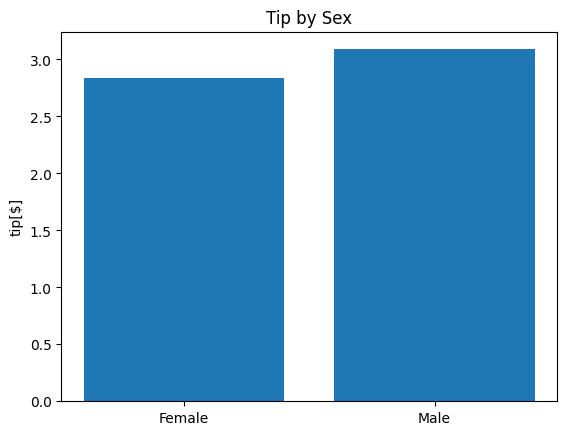

In [17]:
x = sex.keys()
y = sex.values()

plt.bar(x=x, height=y)
plt.ylabel("tip[$]")
plt.title("Tip by Sex")

In [20]:
# 요일에 따른 평균의 tip 그래프

grouped_by_day = df.groupby(by=["day"])["tip"]

In [24]:
mean = grouped_by_day.agg(["mean"])
mean

,mean
day,
Fri,2.734737
Sat,2.993103
Sun,3.255132
Thur,2.771452


<BarContainer object of 4 artists>

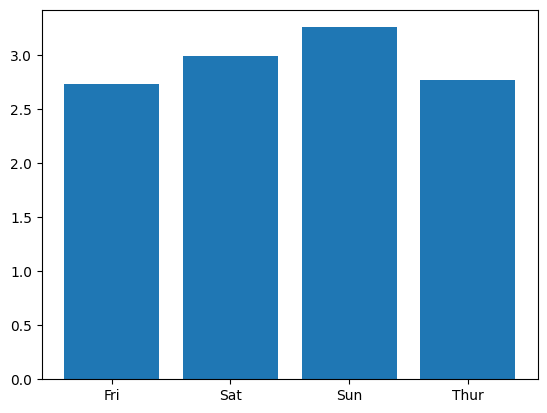

In [34]:
mean = mean.to_dict()["mean"]
x = mean.keys()
y = mean.values()
plt.bar(x=x, height=y)

<Axes: xlabel='sex', ylabel='tip'>

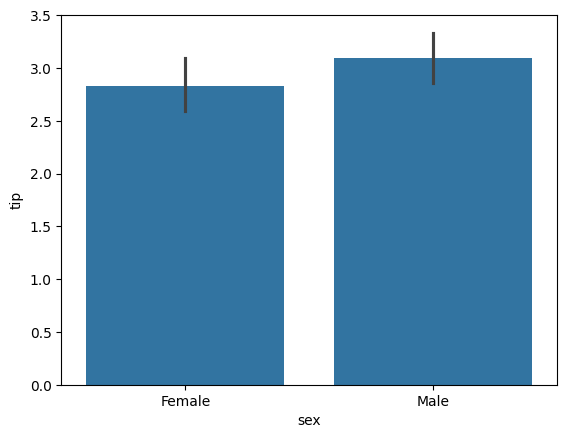

In [36]:
# seaborn 활용
import seaborn as sns
sns.barplot(data=df, x="sex", y="tip")

Text(0.5, 1.0, 'Tip by Sex')

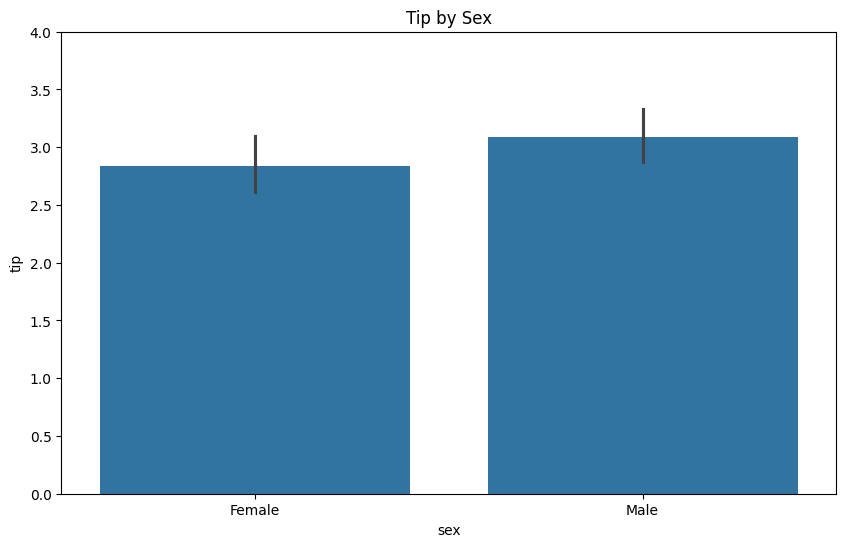

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="sex", y="tip")
plt.ylim(0, 4)
plt.title("Tip by Sex")

Text(0.5, 1.0, 'Tip by day')

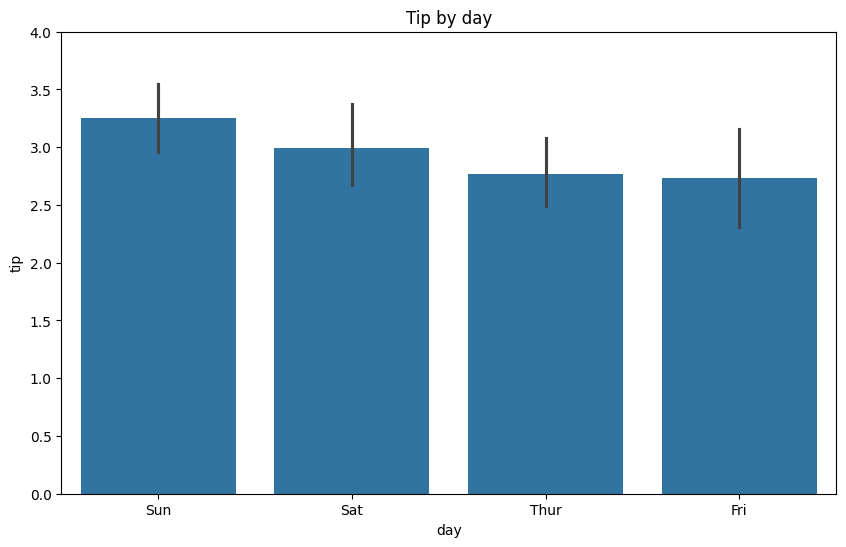

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="day", y="tip")
plt.ylim(0 ,4)
plt.title("Tip by day")

<Axes: xlabel='day', ylabel='tip'>

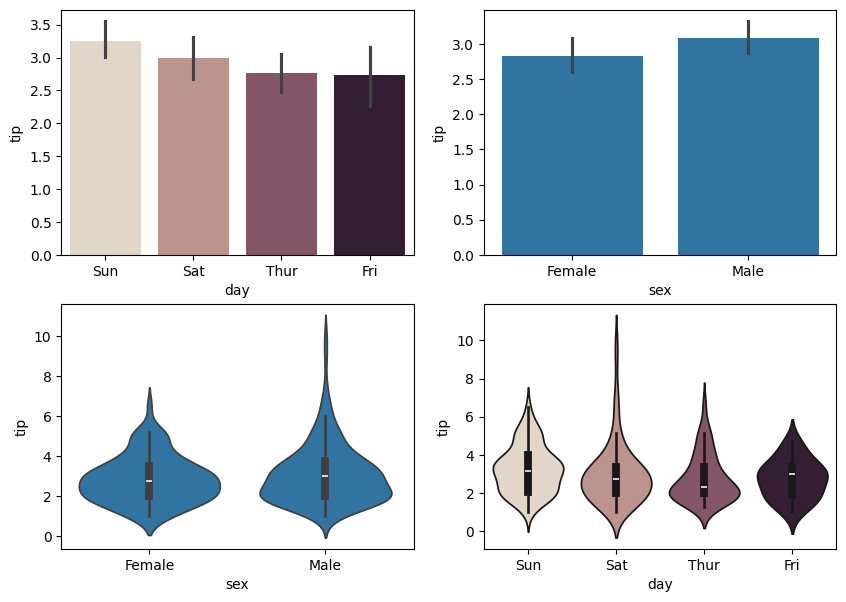

In [48]:
# subplot 활용

fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(2,2,1)
sns.barplot(ax=ax1, data=df, x="day", y="tip", hue="day", palette="ch:.25")

ax2 = fig.add_subplot(2,2,2)
sns.barplot(ax=ax2, data=df, x="sex", y="tip")

ax3 = fig.add_subplot(2,2,3)
sns.violinplot(ax=ax3, data=df, x="sex", y="tip")

ax4 = fig.add_subplot(2,2,4)
sns.violinplot(ax=ax4, data=df, x="day", y="tip", hue="day", palette="ch:.25")

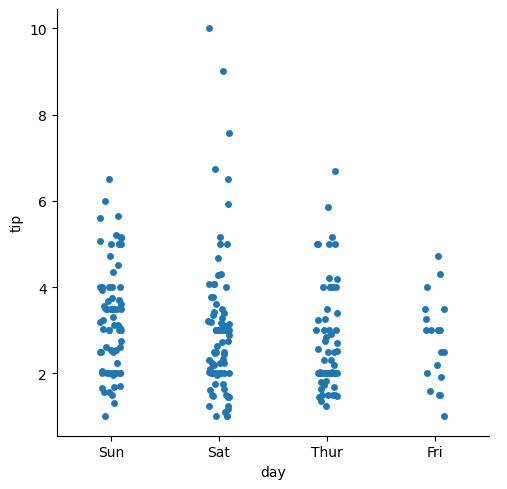

In [53]:
# catplot
sns.catplot(data=df, x="day", y="tip", jitter=True)

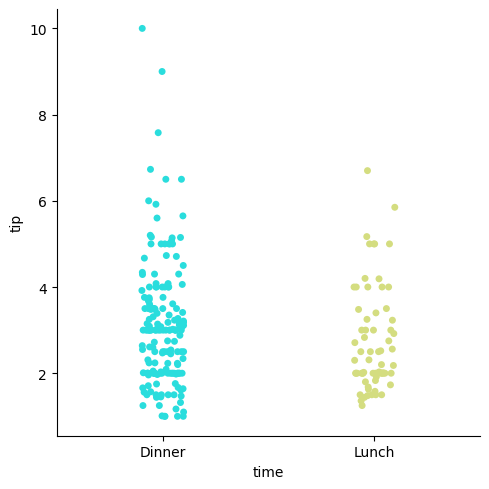

In [58]:
# 시간대(time)에 따른 tips의 그래프 catplot
sns.catplot(data=df, x="time", y="tip", jitter=True, hue="time", palette="rainbow")